# Tasks-38A
 Please provide 5 examples related to subqueries very similar to the ones on this lesson in which you can use Google Colab and BigQuery as well as your Capstone dataset.


In [ ]:
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
import sqlite3

conn = sqlite3.connect(":memory:")

In [ ]:
# Let's get some of the datasets form Capstone Projects
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [ ]:
customers.to_sql("customers",  conn, if_exists="replace")

In [ ]:
orders.to_sql("orders",  conn, if_exists="replace")

In [ ]:
order_items.to_sql("order_items",  conn, if_exists="replace")

In [ ]:
order_payments.to_sql("order_payments",  conn, if_exists="replace")

In [ ]:
products.to_sql("products",  conn, if_exists="replace")

In [ ]:
#Let's start by looking three datasets to create subqueries
sql = '''
select * 
from customers
LIMIT 5
'''
pd.read_sql_query(sql, conn)

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#Let's start by looking three datasets to create subqueries
sql = '''
select * 
from order_items
LIMIT 5
'''
pd.read_sql_query(sql, conn)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#Let's start by looking three datasets to create subqueries
sql = '''
select * 
from order_payments
LIMIT 5
'''
pd.read_sql_query(sql, conn)

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
#Let's start by looking three datasets to create subqueries
sql = '''
select * 
from orders
LIMIT 5
'''
pd.read_sql_query(sql, conn)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#Let's start by looking three datasets to create subqueries
sql = '''
select * 
from products
LIMIT 5
'''
pd.read_sql_query(sql, conn)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#Let's start look payment_type and product_id 
sql = '''
select payment_type, product_id, order_item_id, price
from order_items I, order_payments P
where I.order_id=P.order_id AND order_item_id>2

'''
pd.read_sql_query(sql, conn)

,payment_type,product_id,order_item_id,price
0,credit_card,e95ee6822b66ac6058e2e4aff656071a,3,21.33
1,boleto,0b0172eb0fd18479d29c3bc122c058c2,3,24.89
2,credit_card,0c4a0f8ab44f9acd2d04e7024f9ba362,3,33.89
3,credit_card,0c4a0f8ab44f9acd2d04e7024f9ba362,4,33.89
4,credit_card,4c3ae5db49258df0784827bdacf3b396,3,24.99
...,...,...,...,...
4302,credit_card,3321ad579f19476d0d668f726f8dffec,4,219.90
4303,credit_card,fdcf45aa23bb8312ecc0027d6e1ef1c4,3,7.84
4304,credit_card,50fd2b788dc166edd20512370dac54df,3,21.90
4305,boleto,43423cdffde7fda63d0414ed38c11a73,3,55.00


In [ ]:
#Let's start look payment_type and product_id 
sql = '''
select payment_type,payment_installments, product_id, order_item_id, (price*order_item_id) AS total_price
from order_items I, order_payments P
where I.order_id=P.order_id AND payment_installments>10
order by order_item_id DESC
'''
pd.read_sql_query(sql, conn)

,payment_type,payment_installments,product_id,order_item_id,total_price
0,credit_card,24,58efb9b638561ce132216a9a612513e2,10,1099.70
1,credit_card,24,58efb9b638561ce132216a9a612513e2,9,989.73
2,credit_card,24,872db866d615db59612ac933f43d6b22,8,879.76
3,credit_card,24,58efb9b638561ce132216a9a612513e2,7,769.79
4,credit_card,24,872db866d615db59612ac933f43d6b22,6,659.82
...,...,...,...,...,...
423,credit_card,24,58efb9b638561ce132216a9a612513e2,1,109.97
424,credit_card,24,9ad536de496ccba6e4a9ac7be933ad9d,1,494.99
425,credit_card,15,edfc544c4047e30a3bc73212e414330d,1,299.00
426,credit_card,11,9ad75bd7267e5c724cb42c71ac56ca72,1,105.90


In [ ]:
# Fistly lets look at the payment type when installments bigger than 10 which types are used.
sql = '''
select DISTINCT(payment_type),payment_installments
from order_items I, order_payments P
where I.order_id=P.order_id AND payment_installments>10
order by order_item_id DESC
'''
pd.read_sql_query(sql, conn)
# As seen below when installments bigger than 10 only credit card is used

,payment_type,payment_installments
0,credit_card,12
1,credit_card,13
2,credit_card,15
3,credit_card,24
4,credit_card,11
5,credit_card,18
6,credit_card,14
7,credit_card,20
8,credit_card,21
9,credit_card,17


In [ ]:
# I wondered the count of payment installments in the data

sql = '''
select payment_type,MAX(payment_installments), MIN(payment_installments), ROUND(AVG(payment_installments),2)
from order_items I, order_payments P
where I.order_id=P.order_id 
group by payment_type

'''
pd.read_sql_query(sql, conn)
# As seen below when credit car is used payment installemnts increasing.

,payment_type,MAX(payment_installments),MIN(payment_installments),"ROUND(AVG(payment_installments),2)"
0,boleto,1,1,1.00
1,credit_card,24,0,3.63
2,debit_card,1,1,1.00
3,voucher,1,1,1.00


### Suprisingly brazilians don't buy too many installments
### Now I wondered the total purchase for each installment type when credit card is used.

In [ ]:
# I wondered the count of payment installments in the data
type_versus_totalitem = pd.read_sql( '''
select payment_type,payment_installments,COUNT(I.order_id) AS Order_Count , SUM(order_item_id) AS total_items
from order_items I, order_payments P
where I.order_id=P.order_id AND payment_type='credit_card'
group by payment_installments

''',conn)
type_versus_totalitem
# As seen below when credit car is used payment installemnts increasing.

,payment_type,payment_installments,Order_Count,total_items
0,credit_card,0,3,4
1,credit_card,1,27785,31357
2,credit_card,2,13722,15765
3,credit_card,3,11756,13714
4,credit_card,4,7979,9443
5,credit_card,5,6017,7209
6,credit_card,6,4617,5814
7,credit_card,7,1828,2156
8,credit_card,8,5063,6303
9,credit_card,9,726,855


In [ ]:
# the most used payment installment is 1.
# After 1 it decreases evenly in up to 6 installments
# However, a sudden increase was observed in the number of products purchased in 10 installments.
# Let's look at the payment installment when it is equal to 10.

Text(0, 0.5, 'Purchased Total Product Counts')

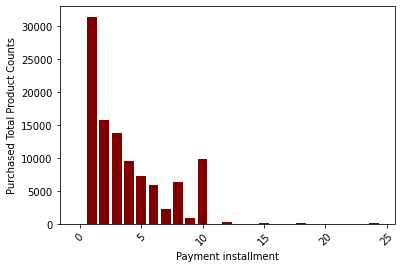

In [ ]:
payment_installment = type_versus_totalitem['payment_installments']
values = type_versus_totalitem['total_items']
   

plt.bar(payment_installment, values, color ='maroon',  
        width = 0.8) 
plt.xticks(rotation= 45)
plt.rcParams["figure.figsize"] = [16,9]
  
plt.xlabel("Payment installment") 
plt.ylabel("Purchased Total Product Counts") 
#plt.title("") 
#plt.show() 

In [ ]:
installment_10 = pd.read_sql( '''
select payment_type,payment_installments,product_id, SUM(order_item_id)
from order_items I, order_payments P
where I.order_id=P.order_id AND payment_type='credit_card' AND payment_installments='10'
group by product_id
order by SUM(order_item_id) DESC
''',conn)
installment_10

,payment_type,payment_installments,product_id,SUM(order_item_id)
0,credit_card,10,37eb69aca8718e843d897aa7b82f462d,120
1,credit_card,10,89b190a046022486c635022524a974a8,120
2,credit_card,10,368c6c730842d78016ad823897a372db,48
3,credit_card,10,99a4788cb24856965c36a24e339b6058,46
4,credit_card,10,0e1fa2aadc04afbf8fb30200aeba06a2,45
...,...,...,...,...
4060,credit_card,10,ffbb3c00e9687ad738ace3977e821da5,1
4061,credit_card,10,ffd2365fb8224dc66883df9351d65deb,1
4062,credit_card,10,ffd259a48b9b073c942884d0f3659566,1
4063,credit_card,10,ffdde3d63e889c9a9f9ec30d82a4c815,1


In [ ]:
#Let's start look payment_type and product_id 
sql = '''
select payment_type, COUNT(product_id), SUM(order_item_id)
from order_items I, order_payments P
where I.order_id=P.order_id 
group by payment_type
'''
pd.read_sql_query(sql, conn)
#here we see that most of the products bougth via credit cards.

,payment_type,COUNT(product_id),SUM(order_item_id)
0,boleto,22867,28640
1,credit_card,86769,102941
2,debit_card,1691,1953
3,voucher,6274,7105


# Here we see that when credit_card is used count of ordered items is the highest.